# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [1]:
# Import warnings
!pip install --upgrade fastparquet


In [3]:
import warnings
warnings.filterwarnings('ignore') 
import fastparquet  

In [13]:
# Import the libraries you will be using for analysis
import numpy as np       
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [ ]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

In [7]:
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 1.26.4
pandas version: 2.2.2
matplotlib version: 3.9.2
seaborn version: 0.13.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [203]:
# Try loading one file
# Select the folder having data files
import os
from datetime import date
# Select the folder having data files

folder_path=r"C:\Users\Lenovo\Desktop\NYC Yellow Trip 2023"
# Create a list of all twelve files to read

file_list = sorted(os.listdir(folder_path))  # to sort files
# Initialise an empty dataframe

df = pd.DataFrame()

# iterate through the list of files and sample one by one:

# Now trying to process each file
for file_name in file_list:
    try:
        file_path = os.path.join(folder_path, file_name)
        print(f"Processing: {file_name}")
        # Add your file reading or processing code here

    except Exception as e:
        print(f"Error processing {file_name}: {e}")

Processing: .ipynb_checkpoints
Processing: combined_sampled_nyc_taxi.csv
Processing: combined_sampled_nyc_taxi.parquet
Processing: yellow_tripdata_2023-01.parquet
Processing: yellow_tripdata_2023-02.parquet
Processing: yellow_tripdata_2023-03.parquet
Processing: yellow_tripdata_2023-04.parquet
Processing: yellow_tripdata_2023-05.parquet
Processing: yellow_tripdata_2023-06.parquet
Processing: yellow_tripdata_2023-07.parquet
Processing: yellow_tripdata_2023-08.parquet
Processing: yellow_tripdata_2023-09.parquet
Processing: yellow_tripdata_2023-10.parquet
Processing: yellow_tripdata_2023-11.parquet
Processing: yellow_tripdata_2023-12.parquet


In [205]:
# Set working directory where all monthly files are stored
data_dir = r'C:\Users\Lenovo\Desktop\NYC Yellow Trip 2023'

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [ ]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [207]:
# Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
#   read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# Create a single dataframe for the year combining all the monthly data

# Select the folder having data files
import os
from datetime import date

# Select the folder having data files

folder_path = r"C:\Users\Lenovo\Desktop\NYC Yellow Trip 2023"

# Create a list of all twelve files to read

file_list = sorted(os.listdir(folder_path))  # to sort files

# Initialise an empty dataframe

df = pd.DataFrame()

# iterate through the list of files and sample one by one:

# Now trying to process each file

for file_name in file_list:
    try:
        file_path = os.path.join(folder_path, file_name)
        print(f"Processing: {file_name}")


        # Reading the current file (parquet file)
        temp_df = pd.read_parquet(file_path)

        # Extract pickup date and hour
        temp_df["pickup_date"] = temp_df["tpep_pickup_datetime"].dt.date
        temp_df["pickup_hour"] = temp_df["tpep_pickup_datetime"].dt.hour

        # We will store the sampled data for the current date in this df by appending the sampled data from each hour to this
        # After completing iteration through each date, we will append this data to the final dataframe.
        sampled_data = pd.DataFrame()

        # Loop through dates and then loop through every hour of each date

        # Loop through each date
        for date in temp_df["pickup_date"].unique():
            day_data = temp_df[temp_df["pickup_date"] == date]
            
    # Iterate through each hour of the selected date
            for hour in range(24):
                hour_data = day_data[day_data["pickup_hour"] == hour]

                # Sample 5% of the hourly data randomly
                if not hour_data.empty:
                    sample = hour_data.sample(frac=0.01, random_state=42) 
#changing the sampling from 5% to 1% since the 5% gives data shape: (1896400, 22), which is very huge compared to the direction of getting 2.5L to 3.0L samples
                    sampled_data = pd.concat([sampled_data, sample])

 
        # Concatenate the sampled data of all the dates to a single dataframe
        df = pd.concat([df, sampled_data], ignore_index=True)

    except Exception as e:
        print(f"Error reading file {file_name}: {e}")


Processing: .ipynb_checkpoints
Error reading file .ipynb_checkpoints: 'tpep_pickup_datetime'
Processing: combined_sampled_nyc_taxi.csv
Error reading file combined_sampled_nyc_taxi.csv: Could not open Parquet input source '<Buffer>': Parquet file size is 2 bytes, smaller than the minimum file footer (8 bytes)
Processing: combined_sampled_nyc_taxi.parquet
Error reading file combined_sampled_nyc_taxi.parquet: 'tpep_pickup_datetime'
Processing: yellow_tripdata_2023-01.parquet
Processing: yellow_tripdata_2023-02.parquet
Processing: yellow_tripdata_2023-03.parquet
Processing: yellow_tripdata_2023-04.parquet
Processing: yellow_tripdata_2023-05.parquet
Processing: yellow_tripdata_2023-06.parquet
Processing: yellow_tripdata_2023-07.parquet
Processing: yellow_tripdata_2023-08.parquet
Processing: yellow_tripdata_2023-09.parquet
Processing: yellow_tripdata_2023-10.parquet
Processing: yellow_tripdata_2023-11.parquet
Processing: yellow_tripdata_2023-12.parquet


After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [212]:
df.shape

(300000, 22)

In [215]:
df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-08-09 16:58:51   2023-08-09 17:13:52              1.0   
1         2  2023-06-19 15:17:13   2023-06-19 15:27:48              1.0   
2         2  2023-12-15 19:24:34   2023-12-15 19:30:03              1.0   
3         2  2023-10-11 11:01:21   2023-10-11 11:07:57              1.0   
4         1  2023-12-17 13:09:28   2023-12-17 13:25:17              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           1.11         1.0                  N           230           246   
1           1.72         1.0                  N           140           161   
2           0.92         1.0                  N           137            79   
3           0.84         1.0                  N            79           144   
4           2.60         1.0                  N           211           246   

   payment_type  ...  mta_tax  tip_amount  tolls_amount  \
0             2  ...      0.5        0.00           0.0   
1             2  ...      0.5        0.00           0.0   
2             1  ...      0.5        2.74           0.0   
3             1  ...      0.5        2.38           0.0   
4             1  ...      0.5        3.00           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  airport_fee  \
0                    1.0         20.00                   2.5          NaN   
1                    1.0         15.40                   2.5          NaN   
2                    1.0         16.44                   2.5          NaN   
3                    1.0         14.28                   2.5          NaN   
4                    1.0         24.00                   2.5          NaN   

   pickup_date  pickup_hour Airport_fee  
0   2023-08-09           16         0.0  
1   2023-06-19           15         0.0  
2   2023-12-15           19         0.0  
3   2023-10-11           11         0.0  
4   2023-12-17           13         0.0  

[5 rows x 22 columns]

In [217]:
df.info

<bound method DataFrame.info of         VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0              2  2023-08-09 16:58:51   2023-08-09 17:13:52              1.0   
1              2  2023-06-19 15:17:13   2023-06-19 15:27:48              1.0   
2              2  2023-12-15 19:24:34   2023-12-15 19:30:03              1.0   
3              2  2023-10-11 11:01:21   2023-10-11 11:07:57              1.0   
4              1  2023-12-17 13:09:28   2023-12-17 13:25:17              1.0   
...          ...                  ...                   ...              ...   
299995         2  2023-04-12 23:45:57   2023-04-12 23:56:45              1.0   
299996         2  2023-01-26 19:44:18   2023-01-26 19:57:34              1.0   
299997         2  2023-06-14 10:39:45   2023-06-14 11:19:58              4.0   
299998         1  2023-10-20 16:33:46   2023-10-20 16:39:13              1.0   
299999         2  2023-06-23 03:05:43   2023-06-23 03:22:11              1.0   

       

In [219]:
# Store the df in csv/parquet
# df.to_parquet('')

# Define your output directory path
output_dir = r"C:\Users\Lenovo\Desktop\NYC Yellow Trip 2023"

# Ensure output directory exists
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Step 1: Optional - Downsample if too large
max_rows = 300_000
if len(df) > max_rows:
    df = df.sample(n=max_rows, random_state=42).reset_index(drop=True)

# Step 2: Save to CSV
csv_path = os.path.join(output_dir, "combined_sampled_nyc_taxi.csv")
df.to_csv(csv_path, index=False)

# Step 3: Save to Parquet
parquet_path = os.path.join(output_dir, "combined_sampled_nyc_taxi.parquet")
df.to_parquet(parquet_path, index=False)

print(f"Final shape: {df.shape}")
print(f"Saved CSV to: {csv_path}")
print(f"Saved Parquet to: {parquet_path}")

Final shape: (300000, 22)
Saved CSV to: C:\Users\Lenovo\Desktop\NYC Yellow Trip 2023\combined_sampled_nyc_taxi.csv
Saved Parquet to: C:\Users\Lenovo\Desktop\NYC Yellow Trip 2023\combined_sampled_nyc_taxi.parquet


## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [221]:
# Load the new data file
df = pd.read_parquet(r"C:\Users\Lenovo\Desktop\NYC Yellow Trip 2023\combined_sampled_nyc_taxi.parquet")
# Replace with your actual file


In [223]:
df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-08-09 16:58:51   2023-08-09 17:13:52              1.0   
1         2  2023-06-19 15:17:13   2023-06-19 15:27:48              1.0   
2         2  2023-12-15 19:24:34   2023-12-15 19:30:03              1.0   
3         2  2023-10-11 11:01:21   2023-10-11 11:07:57              1.0   
4         1  2023-12-17 13:09:28   2023-12-17 13:25:17              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           1.11         1.0                  N           230           246   
1           1.72         1.0                  N           140           161   
2           0.92         1.0                  N           137            79   
3           0.84         1.0                  N            79           144   
4           2.60         1.0                  N           211           246   

   payment_type  ...  mta_tax  tip_amount  tolls_amount  \
0             2  ...      0.5        0.00           0.0   
1             2  ...      0.5        0.00           0.0   
2             1  ...      0.5        2.74           0.0   
3             1  ...      0.5        2.38           0.0   
4             1  ...      0.5        3.00           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  airport_fee  \
0                    1.0         20.00                   2.5          NaN   
1                    1.0         15.40                   2.5          NaN   
2                    1.0         16.44                   2.5          NaN   
3                    1.0         14.28                   2.5          NaN   
4                    1.0         24.00                   2.5          NaN   

   pickup_date  pickup_hour Airport_fee  
0   2023-08-09           16         0.0  
1   2023-06-19           15         0.0  
2   2023-12-15           19         0.0  
3   2023-10-11           11         0.0  
4   2023-12-17           13         0.0  

[5 rows x 22 columns]

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [225]:
# Fix the index and drop any columns that are not needed
# Drop columns with mostly missing or irrelevant data
high_null_cols = df.columns[df.isnull().mean() > 0.90].tolist()
# Also drop irrelevant columns (you can modify this list)
irrelevant_cols = ['store_and_fwd_flag', 'ehail_fee'] 


In [229]:
# Combine and drop
drop_cols = list(set(high_null_cols + irrelevant_cols))
df.drop(columns=drop_cols, inplace=True, errors='ignore')

print(f"\nDropped columns: {drop_cols}")


Dropped columns: ['store_and_fwd_flag', 'airport_fee', 'ehail_fee']


In [231]:
# Convert datetime columns
datetime_cols = ['tpep_pickup_datetime', 'tpep_dropoff_datetime']
for col in datetime_cols:
    if col in df.columns:
        df[col] = pd.to_datetime(df[col], errors='coerce')

# Convert category columns
if 'payment_type' in df.columns:
    df['payment_type'] = df['payment_type'].astype('category')

# Step 5: Rename columns to clean format

df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

print("\nCleaned DataFrame shape:", df.shape)
print("\nRemaining columns:\n", df.columns)

df.to_parquet("combined_sampled_nyc_taxi.parquet", index=False)


Cleaned DataFrame shape: (300000, 20)

Remaining columns:
 Index(['vendorid', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'ratecodeid', 'pulocationid',
       'dolocationid', 'payment_type', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount',
       'congestion_surcharge', 'pickup_date', 'pickup_hour', 'airport_fee'],
      dtype='object')


**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [233]:
# Combine the two airport fee columns

if 'airport_fee' in df.columns and 'additional_airport_fee' in df.columns:
    # Step 2: Combine them into one (sum), handling missing values
    df['total_airport_fee'] = df[['airport_fee', 'additional_airport_fee']].sum(axis=1, skipna=True)

    # Step 3: Drop the original two columns
    df.drop(columns=['airport_fee', 'additional_airport_fee'], inplace=True)

    print("Combined 'airport_fee' and 'additional_airport_fee' into 'total_airport_fee'")
else:
    print("One or both airport fee columns not found in DataFrame.")

One or both airport fee columns not found in DataFrame.


In [235]:
if 'airport_fee' in df.columns:
    df.rename(columns={'airport_fee': 'total_airport_fee'}, inplace=True)
    print("Renamed 'airport_fee' to 'total_airport_fee'")

print(df[['total_airport_fee']].describe())

Renamed 'airport_fee' to 'total_airport_fee'
       total_airport_fee
count      266511.000000
mean            0.142573
std             0.476439
min            -1.750000
25%             0.000000
50%             0.000000
75%             0.000000
max             1.750000


**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [239]:
# check where values of fare amount are negative
#List all monetary columns to check
monetary_cols = ['fare_amount', 'extra', 'mta_tax', 'tip_amount', 
                 'tolls_amount', 'improvement_surcharge', 'total_amount', 'airport_fee']

# Only keep columns that actually exist in the DataFrame
monetary_cols = [col for col in monetary_cols if col in df.columns]

# Step 2: Check rows where any of them are negative

negatives = df[(df[monetary_cols] < 0).any(axis=1)]
print(f"\nRows with negative monetary values: {len(negatives)}")
print(negatives[monetary_cols].head())

# Option 1: Set negative values to 0
for col in monetary_cols:
    df[col] = df[col].apply(lambda x: x if x >= 0 else 0)



Rows with negative monetary values: 2985
     fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
37          -3.7    0.0     -0.5         0.0           0.0   
61         -28.2   -1.0     -0.5         0.0           0.0   
79         -13.5    0.0     -0.5         0.0           0.0   
97          -3.0   -2.5     -0.5         0.0           0.0   
206         -9.3   -1.0     -0.5         0.0           0.0   

     improvement_surcharge  total_amount  
37                    -1.0          -7.7  
61                    -1.0         -33.2  
79                    -1.0         -17.5  
97                    -1.0          -9.5  
206                   -1.0         -14.3  


Did you notice something different in the `RatecodeID` column for above records?

In [241]:
# Analyse RatecodeID for the negative fare amounts
# Filter rows where fare_amount is negative
neg_fare = df[df['fare_amount'] < 0]

# Check RatecodeID values for these rows
print("RatecodeID distribution for negative fare amounts:")
print(neg_fare['ratecodeid'].value_counts(dropna=False))

print(neg_fare[['fare_amount', 'ratecodeid']].head())


RatecodeID distribution for negative fare amounts:
Series([], Name: count, dtype: int64)
Empty DataFrame
Columns: [fare_amount, ratecodeid]
Index: []


In [243]:
# Find which columns have negative values

# Check which columns have negative values
neg_cols = (df.select_dtypes(include='number') < 0).any()
neg_cols = neg_cols[neg_cols].index.tolist()

print("Columns with negative values:", neg_cols)

for col in neg_cols:
    print(f"{col}: {sum(df[col] < 0)} negative values")

Columns with negative values: ['congestion_surcharge', 'total_airport_fee']
congestion_surcharge: 2353 negative values
total_airport_fee: 359 negative values


In [245]:
# fix these negative values

# Set negative monetary values to 0
for col in neg_cols:
    df[col] = df[col].apply(lambda x: x if x >= 0 else 0)

print("Negative values have been fixed (set to 0).")

Negative values have been fixed (set to 0).


### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [247]:
# Find the proportion of missing values in each column
# Show proportion of missing values for each column
missing_proportion = df.isnull().mean().sort_values(ascending=False)

print("Proportion of missing values in each column:")
print(missing_proportion)


Proportion of missing values in each column:
passenger_count          0.03368
ratecodeid               0.03368
vendorid                 0.00000
mta_tax                  0.00000
pickup_hour              0.00000
pickup_date              0.00000
congestion_surcharge     0.00000
total_amount             0.00000
improvement_surcharge    0.00000
tolls_amount             0.00000
tip_amount               0.00000
extra                    0.00000
tpep_pickup_datetime     0.00000
fare_amount              0.00000
payment_type             0.00000
dolocationid             0.00000
pulocationid             0.00000
trip_distance            0.00000
tpep_dropoff_datetime    0.00000
total_airport_fee        0.00000
dtype: float64


**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [249]:
# Display the rows with null values
# Impute NaN values in 'passenger_count'
# Show rows where passenger_count is missing
missing_passenger = df[df['passenger_count'].isnull()]
print("Rows with missing passenger_count:\n")
print(missing_passenger.head())

Rows with missing passenger_count:

     vendorid tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
15          2  2023-10-19 17:53:00   2023-10-19 18:54:00              NaN   
27          2  2023-10-21 18:37:00   2023-10-21 18:41:00              NaN   
112         1  2023-06-07 11:34:08   2023-06-07 11:49:16              NaN   
181         2  2023-09-12 11:25:21   2023-09-12 11:58:40              NaN   
198         2  2023-10-17 08:26:41   2023-10-17 08:48:50              NaN   

     trip_distance  ratecodeid  pulocationid  dolocationid payment_type  \
15           20.28         NaN           263             1            0   
27            0.94         NaN           262           141            0   
112           0.80         NaN           231           231            0   
181           6.86         NaN            41            68            0   
198           2.53         NaN            79           162            0   

     fare_amount  extra  mta_tax  tip_amount  toll

Did you find zeroes in passenger_count? Handle these.

In [251]:
missing_count = df['passenger_count'].isnull().sum()
print(f"\nNumber of missing values in 'passenger_count': {missing_count}")

median_value = df['passenger_count'].median()
df['passenger_count'].fillna(median_value, inplace=True)
print(f"Filled missing passenger_count with median: {median_value}")

print("Missing values after imputation:", df['passenger_count'].isnull().sum())


Number of missing values in 'passenger_count': 10104
Filled missing passenger_count with median: 1.0
Missing values after imputation: 0


In [253]:
zero_passenger = df[df['passenger_count'] == 0]
print(f"Number of rows with passenger_count = 0: {len(zero_passenger)}")
print(zero_passenger[['passenger_count', 'fare_amount']].head())

Number of rows with passenger_count = 0: 4602
     passenger_count  fare_amount
189              0.0         12.8
217              0.0         24.7
228              0.0         70.0
285              0.0          5.8
315              0.0         10.7


In [255]:
df = df[df['passenger_count'] != 0]
print("Dropped all rows where passenger_count == 0")

Dropped all rows where passenger_count == 0


In [257]:
print("Value counts after handling:")
print(df['passenger_count'].value_counts().sort_index())

Value counts after handling:
passenger_count
1.0    227816
2.0     44253
3.0     10916
4.0      6147
5.0      3785
6.0      2478
8.0         3
Name: count, dtype: int64


**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [259]:
# Fix missing values in 'RatecodeID'

missing_count = df['ratecodeid'].isnull().sum()
print(f"Missing values in 'RatecodeID': {missing_count}")

Missing values in 'RatecodeID': 10104


In [261]:
mode_value = df['ratecodeid'].mode()[0]
print(f"Most common RatecodeID (mode): {mode_value}")

df['ratecodeid'].fillna(mode_value, inplace=True)
print(f"Filled missing 'RatecodeID' with mode: {mode_value}")

print("Remaining nulls in 'RatecodeID':", df['ratecodeid'].isnull().sum())

Most common RatecodeID (mode): 1.0
Filled missing 'RatecodeID' with mode: 1.0
Remaining nulls in 'RatecodeID': 0


**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [263]:
# handle null values in congestion_surcharge
missing_count = df['congestion_surcharge'].isnull().sum()
print(f"Missing values in 'congestion_surcharge': {missing_count}")



Missing values in 'congestion_surcharge': 0


In [265]:
print("Value counts of congestion_surcharge:\n", df['congestion_surcharge'].value_counts())
print("Summary statistics:\n", df['congestion_surcharge'].describe())

Value counts of congestion_surcharge:
 congestion_surcharge
2.5    260475
0.0     34922
1.0         1
Name: count, dtype: int64
Summary statistics:
 count    295398.000000
mean          2.204445
std           0.807176
min           0.000000
25%           2.500000
50%           2.500000
75%           2.500000
max           2.500000
Name: congestion_surcharge, dtype: float64


In [267]:
df['congestion_surcharge'].fillna(0, inplace=True)
print("Remaining nulls in 'congestion_surcharge':", df['congestion_surcharge'].isnull().sum())

Remaining nulls in 'congestion_surcharge': 0


Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [269]:
# Handle any remaining missing values

# Find columns with missing values
missing_summary = df.isnull().sum()
missing_summary = missing_summary[missing_summary > 0]

print("Columns with remaining missing values:\n")
print(missing_summary)


Columns with remaining missing values:

Series([], dtype: int64)


In [271]:
for col in missing_summary.index:
    if df[col].dtype == 'float64' or df[col].dtype == 'int64':
        # Numeric column — use median
        median_val = df[col].median()
        df[col].fillna(median_val, inplace=True)
        print(f"Filled missing values in '{col}' with median: {median_val}")
    else:
        # Categorical column — use mode
        mode_val = df[col].mode()[0]
        df[col].fillna(mode_val, inplace=True)
        print(f"Filled missing values in '{col}' with mode: {mode_val}")

print("\nCheck for any remaining missing values:")
print(df.isnull().sum().sort_values(ascending=False))


Check for any remaining missing values:
vendorid                 0
tpep_pickup_datetime     0
pickup_hour              0
pickup_date              0
congestion_surcharge     0
total_amount             0
improvement_surcharge    0
tolls_amount             0
tip_amount               0
mta_tax                  0
extra                    0
fare_amount              0
payment_type             0
dolocationid             0
pulocationid             0
ratecodeid               0
trip_distance            0
passenger_count          0
tpep_dropoff_datetime    0
total_airport_fee        0
dtype: int64


### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

In [273]:
# Describe the data and check if there are any potential outliers present
# Check for potential out of place values in various columns

# Describe key numeric columns
df.describe(include='number').T

count        mean         std  min     25%     50%  \
vendorid               295398.0    1.748847    0.438181  1.0    1.00    2.00   
passenger_count        295398.0    1.379410    0.869587  1.0    1.00    1.00   
trip_distance          295398.0    4.167363  230.972258  0.0    1.04    1.78   
ratecodeid             295398.0    1.593521    7.119798  1.0    1.00    1.00   
pulocationid           295398.0  164.966337   64.108668  1.0  132.00  162.00   
dolocationid           295398.0  163.703539   69.854462  1.0  113.00  162.00   
fare_amount            295398.0   19.713886   18.519035  0.0    9.30   13.50   
extra                  295398.0    1.541061    1.815815  0.0    0.00    1.00   
mta_tax                295398.0    0.490185    0.069729  0.0    0.50    0.50   
tip_amount             295398.0    3.522301    4.029626  0.0    1.00    2.80   
tolls_amount           295398.0    0.591575    2.174158  0.0    0.00    0.00   
improvement_surcharge  295398.0    0.989139    0.102998  0.0    1.00    1.00   
total_amount           295398.0   28.697793   23.104101  0.0   15.95   21.00   
congestion_surcharge   295398.0    2.204445    0.807176  0.0    2.50    2.50   
pickup_hour            295398.0   14.263759    5.818810  0.0   11.00   15.00   
total_airport_fee      295398.0    0.129301    0.448005  0.0    0.00    0.00   

                          75%        max  
vendorid                 2.00       6.00  
passenger_count          1.00       8.00  
trip_distance            3.41  116439.71  
ratecodeid               1.00      99.00  
pulocationid           234.00     265.00  
dolocationid           234.00     265.00  
fare_amount             21.90     715.60  
extra                    2.50      11.75  
mta_tax                  0.50       4.00  
tip_amount               4.42     126.35  
tolls_amount             0.00      81.00  
improvement_surcharge    1.00       1.00  
total_amount            30.80     724.15  
congestion_surcharge     2.50       2.50  
pickup_hour             19.00      23.00  
total_airport_fee        0.00       1.75

**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [275]:
# check for negative or unusually large fare amounts
print("Fare amounts < $0:")
print(df[df['fare_amount'] < 0].shape[0])

print("\nFare amounts > $300:")
print(df[df['fare_amount'] > 300].shape[0])

# Example: very high or low trip distance
print("\nTrip distance == 0:")
print(df[df['trip_distance'] == 0].shape[0])

print("Trip distance > 100 miles:")
print(df[df['trip_distance'] > 100].shape[0])

Fare amounts < $0:
0

Fare amounts > $300:
31

Trip distance == 0:
6074
Trip distance > 100 miles:
12


In [277]:
# Initial shape
print("Initial shape:", df.shape)

Initial shape: (295398, 20)


In [279]:
# remove passenger_count > 6
df = df[df['passenger_count'] <= 6]
print("After removing passenger_count > 6:", df.shape)

After removing passenger_count > 6: (295395, 20)


In [281]:
# Continue with outlier handling
#Drop Trips Where trip_distance ≈ 0 AND fare_amount > 300
df = df[~((df['trip_distance'] <= 0.01) & (df['fare_amount'] > 300))]
print("After removing unrealistic high fares with near-zero distance:", df.shape)

#Drop Trips With Zero Fare and Distance but Pickup ≠ Dropoff

df = df[~((df['trip_distance'] == 0) & 
          (df['fare_amount'] == 0) )]
print("After removing 0 distance/fare with different zones:", df.shape)

#Drop Trips With Very Long Distances (Over 250 miles)

df = df[df['trip_distance'] <= 250]
print("After removing long distance outliers (>250 miles):", df.shape)

#Remove payment_type == 0 (Invalid Code)
df = df[df['payment_type'] != 0]
print("After removing invalid payment_type == 0:", df.shape)

print("\nFinal shape after all outlier cleaning:", df.shape)
print("Remaining trips with fare > 300:", df[df['fare_amount'] > 300].shape[0])

# Remove trips with more than 6 passengers (rare / outliers)
df = df[df['passenger_count'] <= 6]

# Confirm the change
print("Remaining rows after removing passenger_count > 6:", df.shape[0])


After removing unrealistic high fares with near-zero distance: (295386, 20)
After removing 0 distance/fare with different zones: (294995, 20)
After removing long distance outliers (>250 miles): (294986, 20)
After removing invalid payment_type == 0: (284888, 20)

Final shape after all outlier cleaning: (284888, 20)
Remaining trips with fare > 300: 21
Remaining rows after removing passenger_count > 6: 284888


In [283]:
# Do any columns need standardising?

# Identify Numerical Columns
# Select numeric columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
print("Numeric columns:\n", numeric_cols)

Numeric columns:
 ['vendorid', 'passenger_count', 'trip_distance', 'ratecodeid', 'pulocationid', 'dolocationid', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'total_airport_fee']


In [285]:
# Check Their Ranges
df[numeric_cols].describe().T[['min', 'max']]

min     max
vendorid               1.0    2.00
passenger_count        1.0    6.00
trip_distance          0.0  209.80
ratecodeid             1.0   99.00
pulocationid           1.0  265.00
dolocationid           1.0  265.00
fare_amount            0.0  715.60
extra                  0.0   11.75
mta_tax                0.0    4.00
tip_amount             0.0  126.35
tolls_amount           0.0   81.00
improvement_surcharge  0.0    1.00
total_amount           0.0  724.15
congestion_surcharge   0.0    2.50
total_airport_fee      0.0    1.75

In [287]:
# Standardize (Optional Code)
from sklearn.preprocessing import StandardScaler

# Choose columns to scale
cols_to_scale = ['trip_distance', 'fare_amount', 'tip_amount', 'total_amount']

# Initialize scaler
scaler = StandardScaler()

# Fit-transform and create new DataFrame
df_scaled = df.copy()
df_scaled[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

print("Standardized columns:", cols_to_scale)

Standardized columns: ['trip_distance', 'fare_amount', 'tip_amount', 'total_amount']


## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [289]:
df.columns.tolist()

['vendorid',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'ratecodeid',
 'pulocationid',
 'dolocationid',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'pickup_date',
 'pickup_hour',
 'total_airport_fee']

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`:
* `tpep_pickup_datetime`:
* `tpep_dropoff_datetime`:
* `passenger_count`:
* `trip_distance`:
* `RatecodeID`:
* `PULocationID`:
* `DOLocationID`:
* `payment_type`:
* `pickup_hour`:
* `trip_duration`:


The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount`
* `extra`
* `mta_tax`
* `tip_amount`
* `tolls_amount`
* `improvement_surcharge`
* `total_amount`
* `congestion_surcharge`
* `airport_fee`

##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

<Axes: title={'center': 'Trips by Pickup Hour'}, xlabel='pickup_hour'>

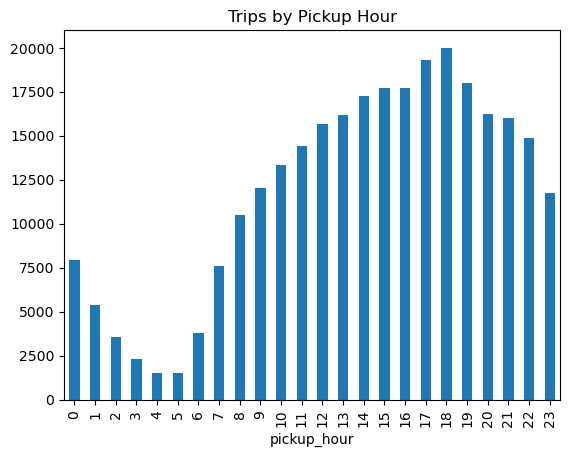

In [291]:
# Find and show the hourly trends in taxi pickups
# Trip counts by hour of the day
#Trip Volume Trends
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour
df.groupby('pickup_hour').size().plot(kind='bar', title='Trips by Pickup Hour')


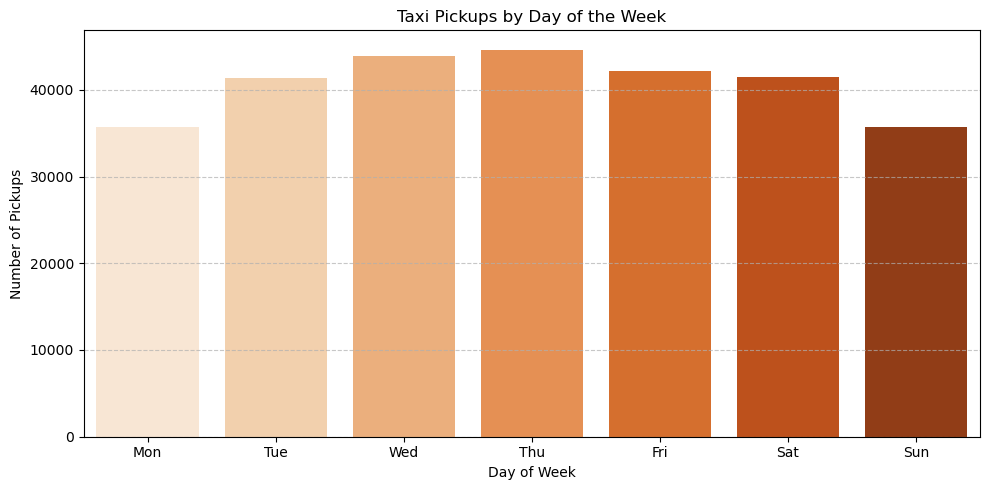

In [313]:
# Find and show the daily trends in taxi pickups (days of the week)

plt.figure(figsize=(10, 5))
days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
sns.countplot(x='pickup_dayofweek', data=df, palette='Oranges')
plt.title('Taxi Pickups by Day of the Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Pickups')
plt.xticks(ticks=range(7), labels=days)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

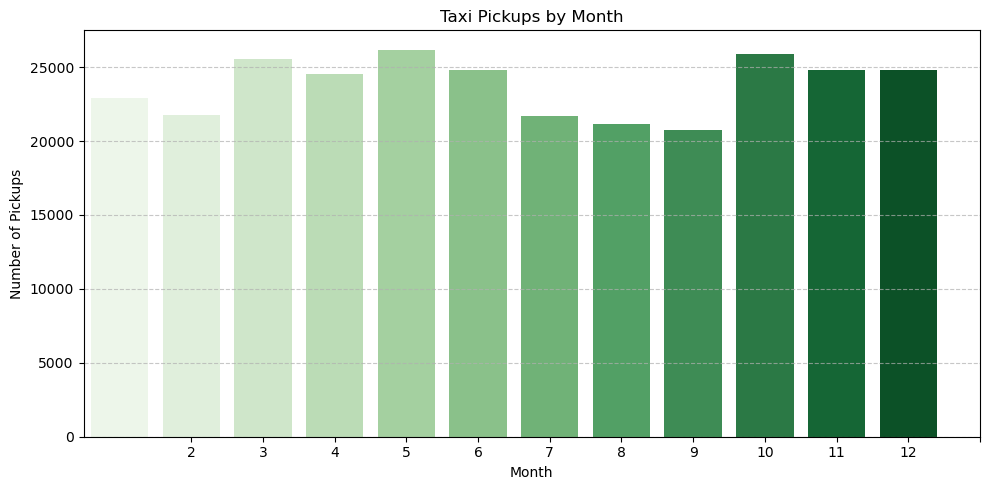

In [311]:
# Show the monthly trends in pickups

# Plot pickups by month
plt.figure(figsize=(10, 5))
sns.countplot(x='pickup_month', data=df, palette='Greens')
plt.title('Taxi Pickups by Month')
plt.xlabel('Month')
plt.ylabel('Number of Pickups')
plt.xticks(range(1, 13))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [315]:
# Analyse the above parameters
(df[['fare_amount', 'tip_amount', 'total_amount', 'trip_distance']] <= 0).sum()


fare_amount       2635
tip_amount       65589
total_amount      2610
trip_distance     3433
dtype: int64

In [317]:
df = df[
    (df['fare_amount'] > 0) &
    (df['tip_amount'] >= 0) &
    (df['total_amount'] > 0) &
    (df['trip_distance'] > 0)
]

Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [323]:
# Create a df with non zero entries for the selected parameters.

# Create a filtered copy where key financial metrics and trip_distance are > 0
filtered_df = df[
    (df['fare_amount'] > 0) &
    (df['tip_amount'] >= 0) &  # tips can be zero
    (df['total_amount'] > 0) &
    (df['trip_distance'] > 0)  # further filtering can be done on zone info
].copy()

print(f"Original rows: {len(df)}")
print(f"Filtered rows: {len(filtered_df)}")

Original rows: 278820
Filtered rows: 278820


**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

In [325]:
# Group data by month and analyse monthly revenue
# Ensure the pickup datetime column is in datetime format
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])

# Extract month and year from pickup datetime
df['pickup_month'] = df['tpep_pickup_datetime'].dt.to_period('M')  # YYYY-MM format

# Group by month and sum total_amount for monthly revenue
monthly_revenue = df.groupby('pickup_month')['total_amount'].sum().reset_index()

# Convert Period to string for plotting
monthly_revenue['pickup_month'] = monthly_revenue['pickup_month'].astype(str)


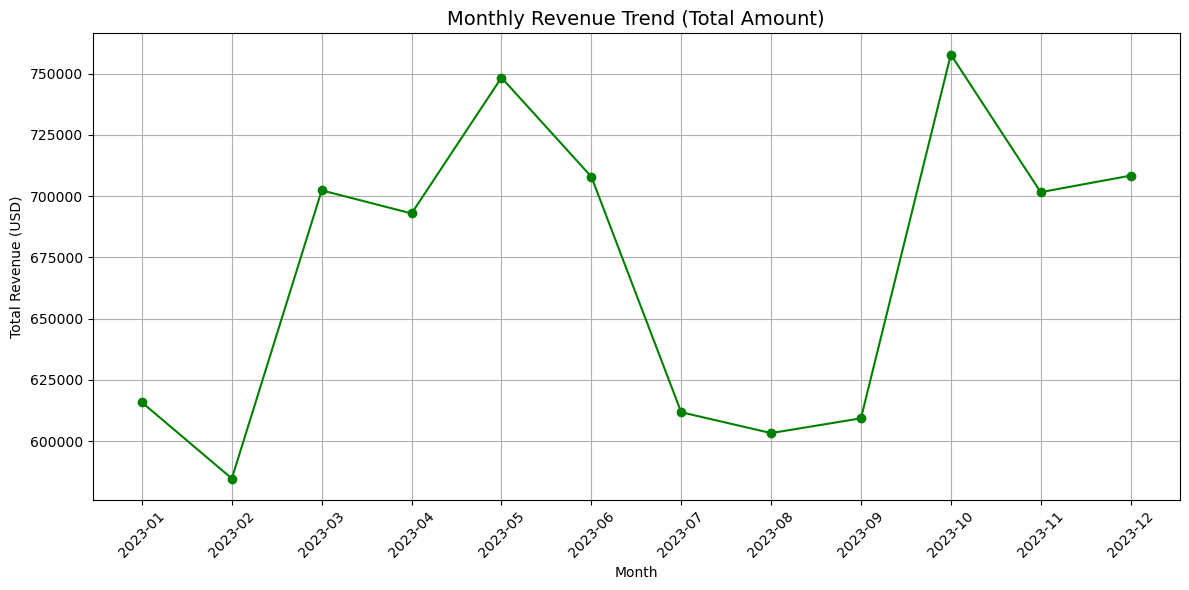

In [327]:
# Plot the trend

plt.figure(figsize=(12, 6))
plt.plot(monthly_revenue['pickup_month'], monthly_revenue['total_amount'], marker='o', color='green')
plt.title('Monthly Revenue Trend (Total Amount)', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Total Revenue (USD)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

In [329]:
# Calculate proportion of each quarter
# Ensure pickup datetime is in datetime format
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])

# Extract quarter and year (optional, if data has multiple years)
df['quarter'] = df['tpep_pickup_datetime'].dt.to_period('Q')

# Group by quarter and sum the total_amount (revenue)
quarterly_revenue = df.groupby('quarter')['total_amount'].sum().reset_index()

# Calculate proportion of each quarter
total_revenue = quarterly_revenue['total_amount'].sum()
quarterly_revenue['proportion'] = quarterly_revenue['total_amount'] / total_revenue

# Display the result
print(quarterly_revenue)




  quarter  total_amount  proportion
0  2023Q1    1903006.54    0.236556
1  2023Q2    2149309.95    0.267173
2  2023Q3    1824501.63    0.226797
3  2023Q4    2167826.02    0.269474


**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

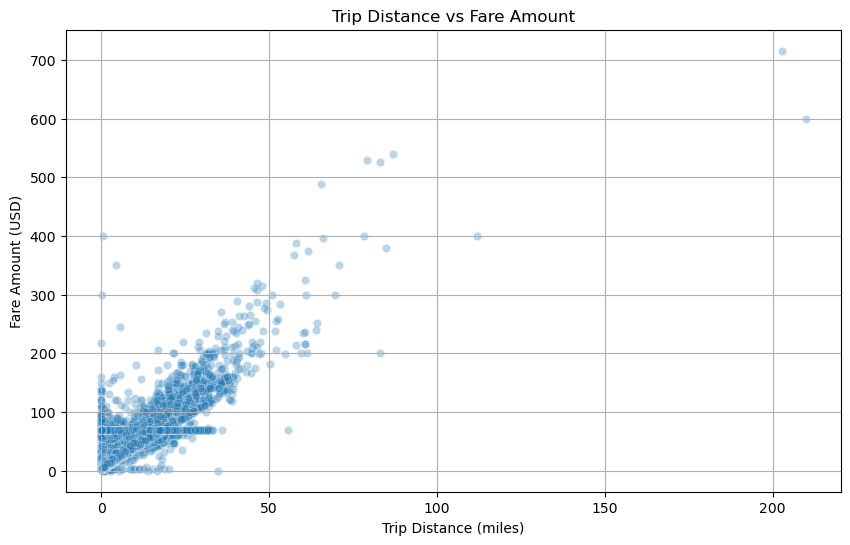

In [331]:
# Show how trip fare is affected by distance
# Remove entries where trip_distance is 0 or fare_amount is 0 (optional but helpful)
df_filtered = df[(df['trip_distance'] > 0) & (df['fare_amount'] > 0)]

# Scatter plot to visualize the relationship
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_filtered, x='trip_distance', y='fare_amount', alpha=0.3)
plt.title('Trip Distance vs Fare Amount')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Fare Amount (USD)')
plt.grid(True)
plt.show()



**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

In [341]:
# Show relation ship between fare and trip duration
# Calculate and print the correlation
correlation = df_filtered['trip_distance'].corr(df_filtered['fare_amount'])
print(f"Correlation between trip_distance and fare_amount: {correlation:.4f}")


Correlation between trip_distance and fare_amount: 0.9454


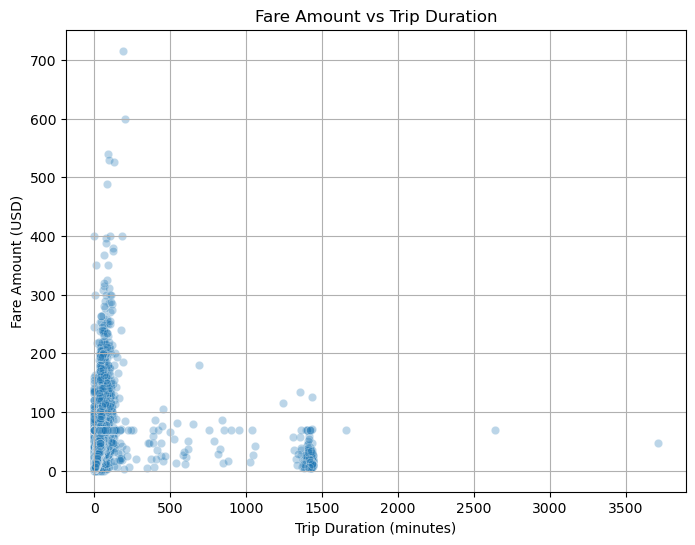

Correlation between fare_amount and trip_duration: 0.2654


In [343]:
# Ensure datetime columns are in datetime format
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])

# Calculate trip duration in minutes
df['trip_duration'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds() / 60

# Filter to remove invalid durations and fare_amounts
df_filtered = df[(df['trip_duration'] > 0) & (df['fare_amount'] > 0)]

# === 1. Fare amount vs Trip duration ===
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_filtered, x='trip_duration', y='fare_amount', alpha=0.3)
plt.title('Fare Amount vs Trip Duration')
plt.xlabel('Trip Duration (minutes)')
plt.ylabel('Fare Amount (USD)')
plt.grid(True)
plt.show()

cor1 = df_filtered['trip_duration'].corr(df_filtered['fare_amount'])
print(f"Correlation between fare_amount and trip_duration: {cor1:.4f}")

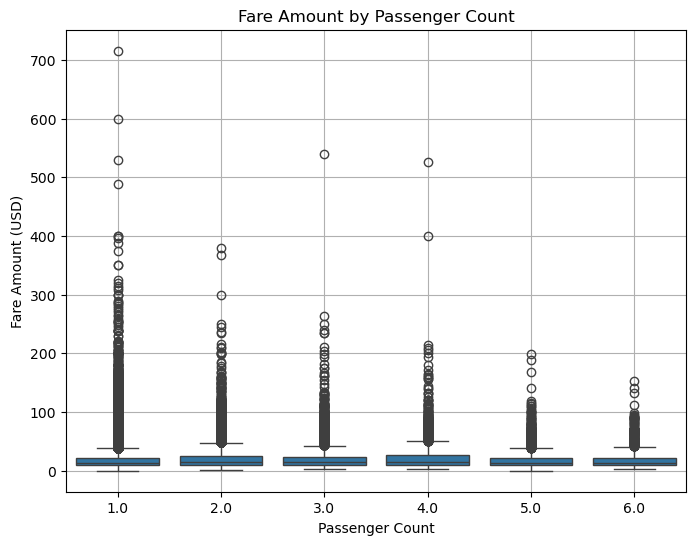

Correlation between fare_amount and passenger_count: 0.0438


In [345]:
# Show relationship between fare and number of passengers
# === 2. Fare amount vs Passenger count ===
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_filtered, x='passenger_count', y='fare_amount')
plt.title('Fare Amount by Passenger Count')
plt.xlabel('Passenger Count')
plt.ylabel('Fare Amount (USD)')
plt.grid(True)
plt.show()

cor2 = df_filtered['passenger_count'].corr(df_filtered['fare_amount'])
print(f"Correlation between fare_amount and passenger_count: {cor2:.4f}")



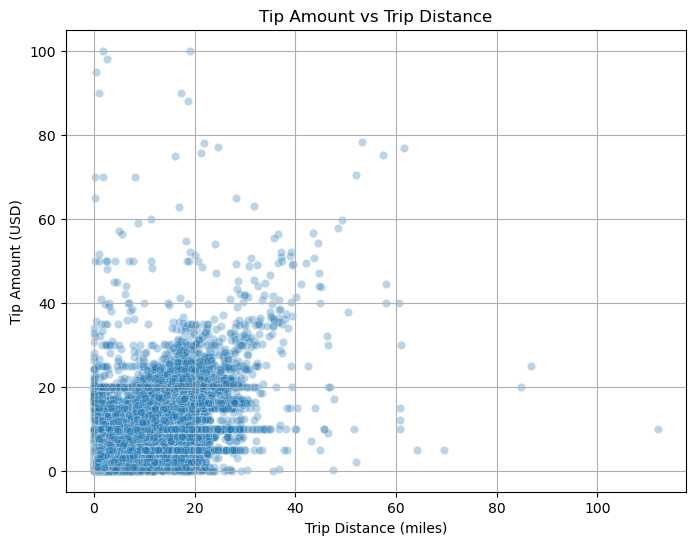

Correlation between tip_amount and trip_distance: 0.8083


In [349]:
# Show relationship between tip and trip distance
# === 3. Tip amount vs Trip distance ===
df_tip = df[(df['trip_distance'] > 0) & (df['tip_amount'] > 0)]

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_tip, x='trip_distance', y='tip_amount', alpha=0.3)
plt.title('Tip Amount vs Trip Distance')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Tip Amount (USD)')
plt.grid(True)
plt.show()

cor3 = df_tip['trip_distance'].corr(df_tip['tip_amount'])
print(f"Correlation between tip_amount and trip_distance: {cor3:.4f}")


**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

               Count  Percentage
payment_type                    
NaN                0        0.00
Credit Card   228002       81.77
Cash           47899       17.18
No Charge        949        0.34
Dispute         1970        0.71


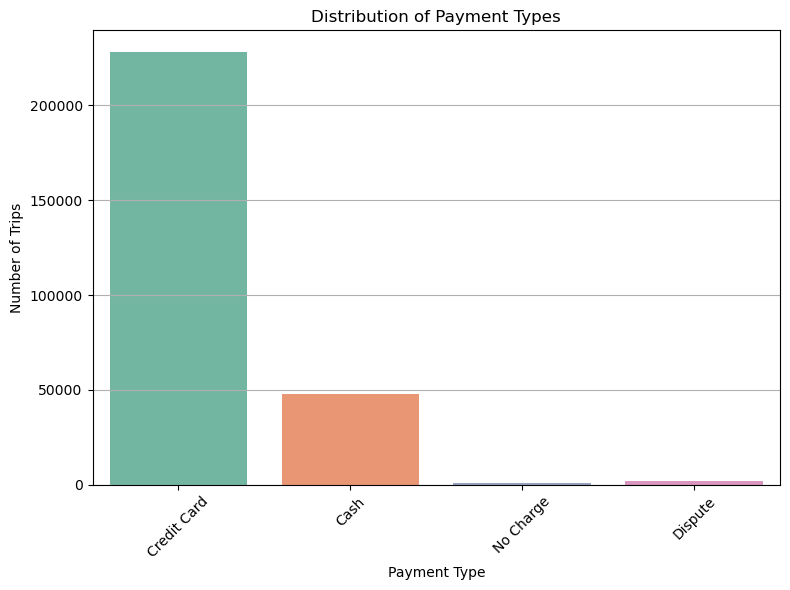

In [351]:
# Analyse the distribution of different payment types (payment_type).
# Count each payment type
payment_counts = df['payment_type'].value_counts().sort_index()
payment_percent = df['payment_type'].value_counts(normalize=True).sort_index() * 100

# Map payment_type codes to labels (based on NYC Taxi data dictionary)
payment_labels = {
    1: 'Credit Card',
    2: 'Cash',
    3: 'No Charge',
    4: 'Dispute',
    5: 'Unknown',
    6: 'Voided Trip'
}
# Apply labels
payment_counts.index = payment_counts.index.map(payment_labels)
payment_percent.index = payment_percent.index.map(payment_labels)

# Display counts and percentages
payment_df = pd.DataFrame({
    'Count': payment_counts,
    'Percentage': payment_percent.round(2)
})
print(payment_df)

# Plot the distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=payment_df.index, y=payment_df['Count'], palette='Set2')
plt.title('Distribution of Payment Types')
plt.xlabel('Payment Type')
plt.ylabel('Number of Trips')
plt.xticks(rotation=45)
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()



- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [353]:
!pip install geopandas

**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [357]:
# import geopandas as gpd
import geopandas as gpd
# Read the shapefile using geopandas
zone_gdf = gpd.read_file(r"C:\Users\Lenovo\Desktop\taxi_zones (1).zip")

# Display basic info
print(zone_gdf.head())

   OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...  
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...  
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...  
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...  
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...  


Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

In [371]:
print(trip_df.columns)

Index(['vendorid', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'ratecodeid', 'pulocationid',
       'dolocationid', 'payment_type', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount',
       'congestion_surcharge', 'pickup_date', 'pickup_hour', 'airport_fee'],
      dtype='object')


In [395]:
# Merge trip counts back to the zones GeoDataFrame
pickup_counts = df.groupby('pulocationid').size().reset_index(name='total_pickups')

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [467]:
# Merge zones and trip records using locationID and PULocationID
# Load parquet
trip_df = pd.read_parquet(r"C:\Users\Lenovo\Desktop\NYC Yellow Trip 2023\combined_sampled_nyc_taxi.parquet")

# Check columns
print(trip_df.columns.tolist())

# Rename to lowercase for consistency (optional)
trip_df.columns = trip_df.columns.str.strip().str.lower()

# Do the same for zone_gdf
zone_gdf = zone_gdf.rename(columns={'locationid': 'pulocationid', 'zone': 'pu_zone', 'borough': 'pu_borough'})

# Merge the pickup zone info with trip data
trip_df = trip_df.merge(zone_gdf[['pulocationid', 'pu_zone', 'pu_borough']], on='pulocationid', how='left')

# For dropoff zone, prepare zone_gdf again
zone_gdf_do = zone_gdf.rename(columns={'pulocationid': 'dolocationid', 'pu_zone': 'do_zone', 'pu_borough': 'do_borough'})

# Merge dropoff zone info
trip_df = trip_df.merge(zone_gdf_do[['dolocationid', 'do_zone', 'do_borough']], on='dolocationid', how='left')


['vendorid', 'tpep_pickup_datetime', 'tpep_dropoff_datetime', 'passenger_count', 'trip_distance', 'ratecodeid', 'pulocationid', 'dolocationid', 'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'pickup_date', 'pickup_hour', 'airport_fee']


In [469]:
# Group data by location and calculate the number of trips

pickup_counts = df.groupby('pulocationid').size().reset_index(name='total_pickups')
pickup_counts = pickup_counts.sort_values(by='total_pickups', ascending=False)
print(pickup_counts.head())

     pulocationid  total_pickups
116           132          14810
213           237          13262
144           161          12951
212           236          11866
145           162           9905


In [471]:
dropoff_counts = df.groupby('dolocationid').size().reset_index(name='total_dropoffs')
dropoff_counts = dropoff_counts.sort_values(by='total_dropoffs', ascending=False)
print(dropoff_counts.head())

     dolocationid  total_dropoffs
227           236           12309
228           237           11973
154           161           11105
221           230            8691
163           170            8392


In [473]:
# Merge trip counts back to the zones GeoDataFrame
pickup_counts = df.groupby('pulocationid').size().reset_index(name='total_pickups')

**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

<Figure size 1500x1000 with 0 Axes>

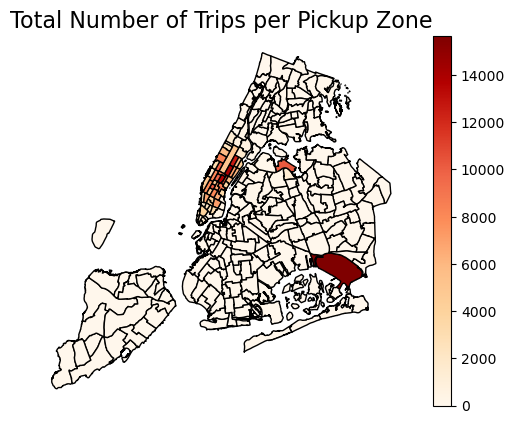

In [475]:
# Group data by location and calculate the number of trips
trip_counts = trip_df.groupby('pulocationid').size().reset_index(name='trip_count')

# 2. Merge this with the zone_gdf GeoDataFrame
zone_trip_map = zone_gdf.merge(trip_counts, on='pulocationid', how='left')

# 3. Fill NaN trip counts with 0 (zones with no trips)
zone_trip_map['trip_count'] = zone_trip_map['trip_count'].fillna(0)

# 4. Plot a map of total trips by pickup zone
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))
zone_trip_map.plot(column='trip_count', cmap='OrRd', legend=True, edgecolor='black')
plt.title('Total Number of Trips per Pickup Zone', fontsize=16)
plt.axis('off')
plt.show()


**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

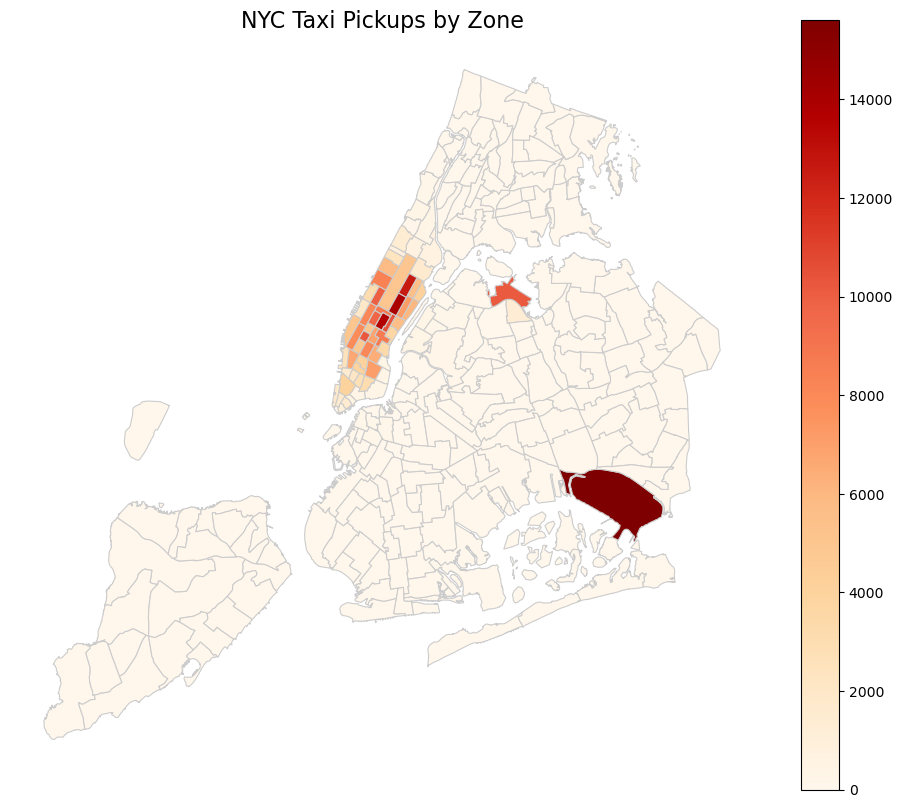

In [399]:
# 1. Create the figure and axis
fig, ax = plt.subplots(1, 1, figsize=(12, 10))

# 2. Plot the GeoDataFrame
zone_trip_map.plot(
    column='trip_count',        # Column to base color on
    cmap='OrRd',                # Color scheme (Orange-Red)
    linewidth=0.8,              # Border line width
    ax=ax,                      # Axis to plot on
    edgecolor='0.8',            # Light grey edges
    legend=True                 # Show color scale
)

# 3. Customize the plot
ax.set_title('NYC Taxi Pickups by Zone', fontsize=16)
ax.set_axis_off()  # Turn off axis

# 4. Show the plot
plt.show()

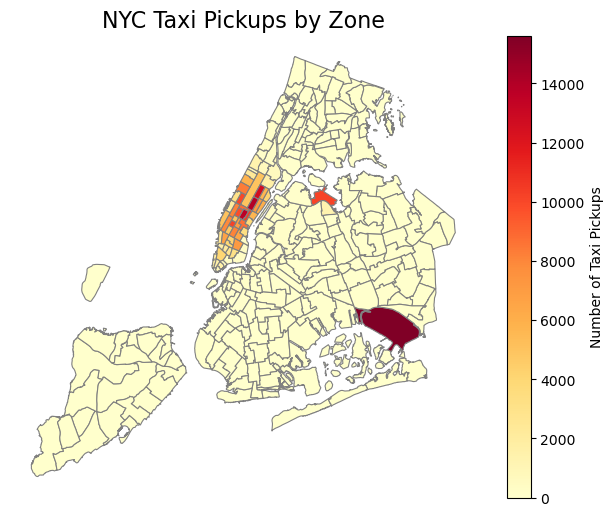

In [401]:
# Merge trip counts back to the zones GeoDataFrame
#This is done in the next step where we use the plot method of the GeoDataFrame.


# 1. Set up the figure and axis
fig, ax = plt.subplots(1, 1, figsize=(8, 6))

# 2. Plot the GeoDataFrame with custom settings
zone_trip_map.plot(
    column='trip_count',                    # Data column for coloring
    ax=ax,                                  # Plot on this axis
    cmap='YlOrRd',                          # Color map (Yellow to Red)
    linewidth=0.8,                          # Border width between zones
    edgecolor='gray',                       # Border color
    legend=True,                            # Show color bar
    legend_kwds={                           # Legend customization
        'label': "Number of Taxi Pickups",
        'orientation': "vertical"
    }
)

# 3. Remove axis lines and set title
ax.set_title("NYC Taxi Pickups by Zone", fontsize=16)
ax.set_axis_off()

# 4. Show the plot
plt.show()



The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

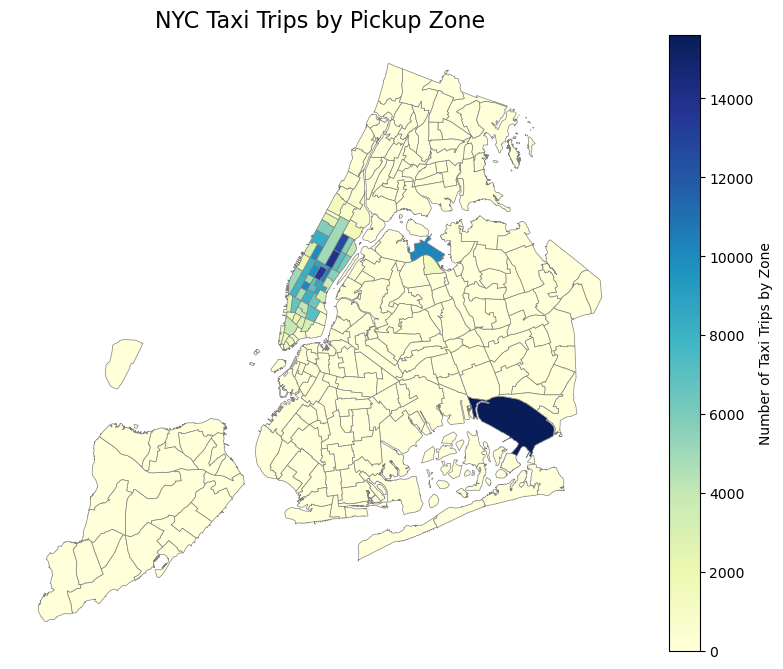

In [407]:
# Define figure and axis
# Plot the map and display it
# can you try displaying the zones DF sorted by the number of trips?
# Define the figure and axis
fig, ax = plt.subplots(1, 1, figsize=(10, 8))

# Plot the map with zones colored by trip count
zone_trip_map.plot(
    column='trip_count',        # column used to color the map
    ax=ax,                      # axis to draw on
    cmap='YlGnBu',              # color map (Yellow-Green-Blue)
    linewidth=0.5,              # thin borders
    edgecolor='gray',           # border color
    legend=True,                # show legend
    legend_kwds={
        'label': "Number of Taxi Trips by Zone",
        'orientation': "vertical"
    }
)

# Set title and remove axis
ax.set_title("NYC Taxi Trips by Pickup Zone", fontsize=16)
ax.set_axis_off()

# Show the plot
plt.show()


Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [409]:
# Find routes which have the slowest speeds at different times of the day

# Ensure trip duration is in minutes
trip_df['trip_duration'] = (trip_df['tpep_dropoff_datetime'] - trip_df['tpep_pickup_datetime']).dt.total_seconds() / 60

# Extract pickup hour
trip_df['pickup_hour'] = trip_df['tpep_pickup_datetime'].dt.hour

# Group by hour and calculate average duration
hourly_duration = trip_df.groupby('pickup_hour')['trip_duration'].mean()


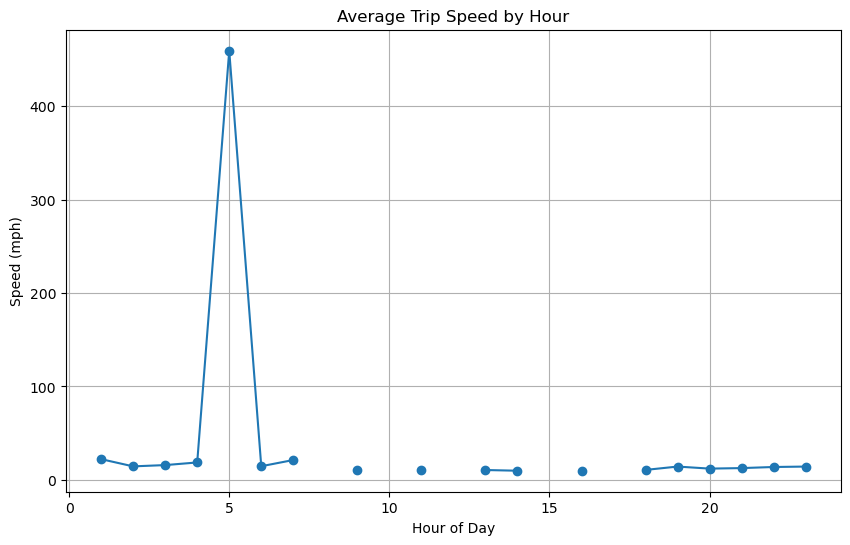

In [411]:
# Calculate speed (miles per minute)
trip_df['trip_speed'] = trip_df['trip_distance'] / (trip_df['trip_duration'] / 60)  # miles/hour

# Group by hour
hourly_speed = trip_df.groupby('pickup_hour')['trip_speed'].mean()

# Plot
hourly_speed.plot(kind='line', marker='o', figsize=(10,6), title='Average Trip Speed by Hour')
plt.ylabel('Speed (mph)')
plt.xlabel('Hour of Day')
plt.grid(True)
plt.show()

In [415]:
# Group by pickup zones
zone_summary = trip_df.groupby('pu_zone')[['trip_duration', 'trip_distance']].mean()
zone_summary['avg_speed'] = zone_summary['trip_distance'] / (zone_summary['trip_duration'] / 60)

# Sort and display top 10 slowest zones
zone_summary_sorted = zone_summary.sort_values('avg_speed').head(10)
print(zone_summary_sorted)

                                  trip_duration  trip_distance  avg_speed
pu_zone                                                                  
Great Kills                            0.050000       0.000000   0.000000
Broad Channel                          0.166667       0.000000   0.000000
Jamaica Bay                            0.500000       0.000000   0.000000
Bronxdale                             42.868333       2.689000   3.763617
Murray Hill-Queens                    36.293333       2.300000   3.802351
East Flatbush/Farragut                69.477381       4.454286   3.846678
Queensbridge/Ravenswood               13.824749       0.893554   3.878063
Saint Michaels Cemetery/Woodside       7.591288       0.595682   4.708148
North Corona                          25.766667       2.034286   4.737017
Boerum Hill                           46.034483       4.011586   5.228584


How does identifying high-traffic, high-demand routes help us?

In [477]:
# Group by pickup and dropoff zones and count trips
high_demand_routes = trip_df.groupby(['pu_zone', 'do_zone']).size().reset_index(name='trip_count')

# Sort by number of trips in descending order
high_demand_routes = high_demand_routes.sort_values(by='trip_count', ascending=False)

# Display top 10 high-demand routes
high_demand_routes.head(10)

pu_zone                    do_zone  trip_count
9148  Upper East Side South      Upper East Side North        1965
9012  Upper East Side North      Upper East Side South        1787
9149  Upper East Side South      Upper East Side South        1410
9011  Upper East Side North      Upper East Side North        1332
9110  Upper East Side South             Midtown Center        1015
6231         Midtown Center      Upper East Side South         914
9341  Upper West Side South        Lincoln Square East         783
5313    Lincoln Square East      Upper West Side South         770
6230         Midtown Center      Upper East Side North         770
4339            JFK Airport  Times Sq/Theatre District         748

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

In [479]:
# Visualise the number of trips per hour and find the busiest hour
# Extract hour of the day from pickup datetime
trip_df['pickup_hour'] = trip_df['tpep_pickup_datetime'].dt.hour

# Count number of trips per hour
trips_by_hour = trip_df['pickup_hour'].value_counts().sort_index()

# Find busiest hour
busiest_hour = trips_by_hour.idxmax()
busiest_hour_count = trips_by_hour.max()

print(f"Busiest hour: {busiest_hour}:00 with {busiest_hour_count:,} trips.")


Busiest hour: 18:00 with 21,094 trips.


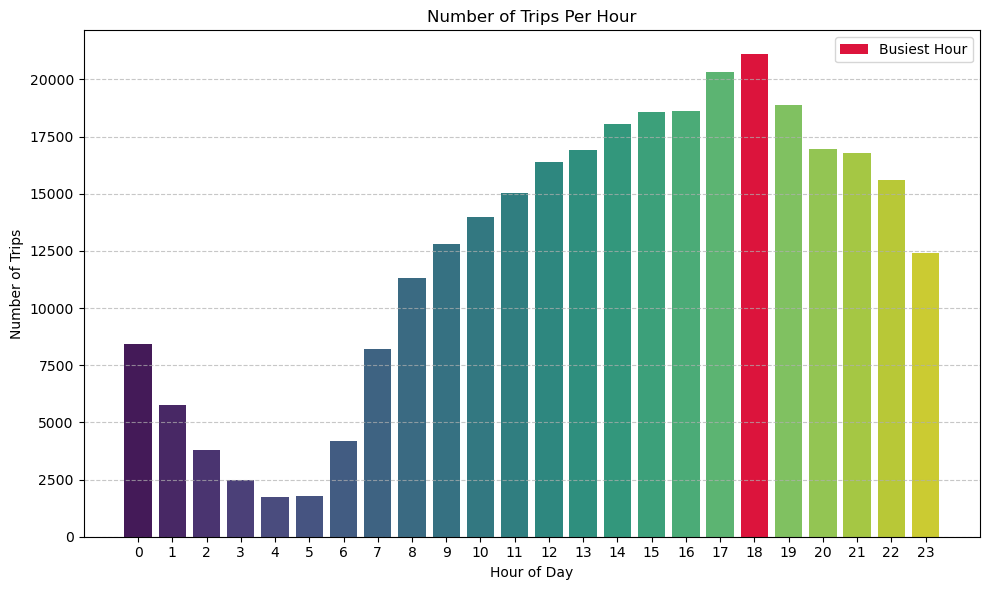

In [481]:
plt.figure(figsize=(10, 6))
sns.barplot(x=trips_by_hour.index, y=trips_by_hour.values, palette="viridis")

# Highlight busiest hour
plt.bar(busiest_hour, busiest_hour_count, color='crimson', label='Busiest Hour')

plt.title('Number of Trips Per Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Trips')
plt.xticks(range(0, 24))
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [431]:
# Scale up the number of trips

# Fill in the value of your sampling fraction and use that to scale up the numbers
# Define your sampling ratio (e.g., 10% of full data was used)
sampling_ratio = 0.10  # Replace with actual ratio if different

# Scale up the trip counts to estimate full data
scaled_trips_by_hour = trips_by_hour / sampling_ratio

# Find top 5 busiest hours
top5_hours = scaled_trips_by_hour.sort_values(ascending=False).head(5)

# Print the results
print("Estimated number of trips in the 5 busiest hours:")
for hour, count in top5_hours.items():
    print(f"{hour}:00 - {int(count):,} trips")

# Optional: display as DataFrame
top5_df = top5_hours.reset_index()
top5_df.columns = ['Hour', 'Estimated Trips']



Estimated number of trips in the 5 busiest hours:
18:00 - 210,900 trips
17:00 - 203,240 trips
19:00 - 189,000 trips
16:00 - 185,940 trips
15:00 - 185,700 trips


**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

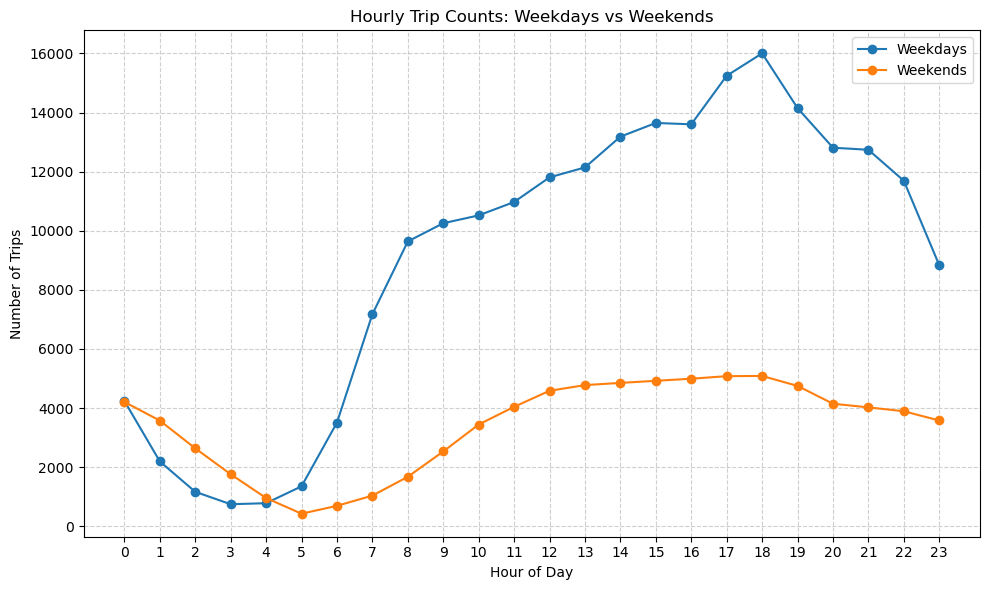

In [435]:
# Ensure datetime column is parsed correctly
trip_df['tpep_pickup_datetime'] = pd.to_datetime(trip_df['tpep_pickup_datetime'])

# Extract day of week and hour
trip_df['day_of_week'] = trip_df['tpep_pickup_datetime'].dt.dayofweek  # Monday=0, Sunday=6
trip_df['hour'] = trip_df['tpep_pickup_datetime'].dt.hour

# Separate into weekdays (0-4) and weekends (5-6)
weekdays_df = trip_df[trip_df['day_of_week'] < 5]
weekends_df = trip_df[trip_df['day_of_week'] >= 5]

# Group and count number of trips per hour
weekday_hourly_counts = weekdays_df['hour'].value_counts().sort_index()
weekend_hourly_counts = weekends_df['hour'].value_counts().sort_index()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(weekday_hourly_counts.index, weekday_hourly_counts.values, label='Weekdays', marker='o')
plt.plot(weekend_hourly_counts.index, weekend_hourly_counts.values, label='Weekends', marker='o')
plt.title("Hourly Trip Counts: Weekdays vs Weekends")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Trips")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()

What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

In [443]:
# Find top 10 pickup and dropoff zones

# Group by pickup zone and hour, count trips
pickup_hourly = trip_df.groupby(['pu_zone', 'pickup_hour']).size().reset_index(name='pickup_count')

# Total pickups per zone
total_pickups = pickup_hourly.groupby('pu_zone')['pickup_count'].sum().reset_index()
top10_pickup_zones = total_pickups.sort_values(by='pickup_count', ascending=False).head(10)['pu_zone'].tolist()

# Filter pickup trends for top 10 zones
pickup_hourly_top10 = pickup_hourly[pickup_hourly['pu_zone'].isin(top10_pickup_zones)]

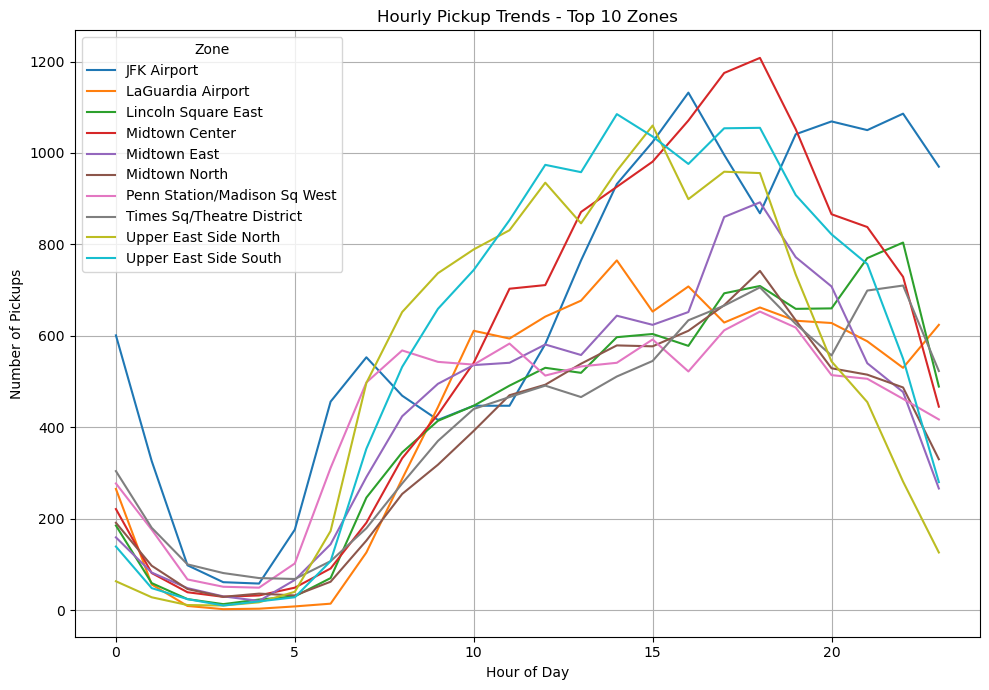

In [445]:
plt.figure(figsize=(10, 7))
sns.lineplot(data=pickup_hourly_top10, x='pickup_hour', y='pickup_count', hue='pu_zone')
plt.title('Hourly Pickup Trends - Top 10 Zones')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Pickups')
plt.legend(title='Zone')
plt.grid(True)
plt.tight_layout()
plt.show()

**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [483]:
# Find the top 10 and bottom 10 pickup/dropoff ratios
# Group by dropoff zone and hour
dropoff_hourly = trip_df.groupby(['do_zone', 'pickup_hour']).size().reset_index(name='dropoff_count')

# Total dropoffs per zone
total_dropoffs = dropoff_hourly.groupby('do_zone')['dropoff_count'].sum().reset_index()
top10_dropoff_zones = total_dropoffs.sort_values(by='dropoff_count', ascending=False).head(10)['do_zone'].tolist()

# Filter dropoff trends for top 10 zones
dropoff_hourly_top10 = dropoff_hourly[dropoff_hourly['do_zone'].isin(top10_dropoff_zones)]


In [485]:
# Total pickups per zone
pickup_counts = trip_df['pu_zone'].value_counts().reset_index()
pickup_counts.columns = ['zone', 'pickup_count']

# Total dropoffs per zone
dropoff_counts = trip_df['do_zone'].value_counts().reset_index()
dropoff_counts.columns = ['zone', 'dropoff_count']

# Merge pickup and dropoff counts
zone_ratio_df = pd.merge(pickup_counts, dropoff_counts, on='zone', how='outer').fillna(0)

# Avoid division by zero by replacing 0 dropoffs with a very small number
zone_ratio_df['dropoff_count'] = zone_ratio_df['dropoff_count'].replace(0, 1e-6)

# Calculate ratio
zone_ratio_df['pickup_dropoff_ratio'] = zone_ratio_df['pickup_count'] / zone_ratio_df['dropoff_count']

# Top 10 zones with highest pickup/dropoff ratio
top_10_ratio = zone_ratio_df.sort_values(by='pickup_dropoff_ratio', ascending=False).head(10)

# Bottom 10 zones with lowest pickup/dropoff ratio
bottom_10_ratio = zone_ratio_df.sort_values(by='pickup_dropoff_ratio', ascending=True).head(10)

print("🔝 Top 10 Zones with Highest Pickup/Dropoff Ratio:")
print(top_10_ratio[['zone', 'pickup_count', 'dropoff_count', 'pickup_dropoff_ratio']])

print("\n🔻 Bottom 10 Zones with Lowest Pickup/Dropoff Ratio:")
print(bottom_10_ratio[['zone', 'pickup_count', 'dropoff_count', 'pickup_dropoff_ratio']])

🔝 Top 10 Zones with Highest Pickup/Dropoff Ratio:
                             zone  pickup_count  dropoff_count  \
66                  East Elmhurst        1336.0            209   
120                   JFK Airport       15652.0           3696   
130             LaGuardia Airport       10170.0           3920   
178  Penn Station/Madison Sq West       10245.0           6504   
40                   Central Park        4993.0           3651   
240                  West Village        6687.0           4953   
105       Greenwich Village South        3910.0           2927   
154                  Midtown East       10411.0           8283   
95               Garment District        4926.0           4129   
134           Lincoln Square East        9960.0           8455   

     pickup_dropoff_ratio  
66               6.392344  
120              4.234848  
130              2.594388  
178              1.575185  
40               1.367571  
240              1.350091  
105              1.335839  

**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

In [487]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones
# Note that the top zones should be of night hours and not the overall top zones

# Make sure pickup and dropoff datetime are in datetime format
trip_df['pickup_hour'] = pd.to_datetime(trip_df['tpep_pickup_datetime']).dt.hour
trip_df['dropoff_hour'] = pd.to_datetime(trip_df['tpep_dropoff_datetime']).dt.hour

# Define night hours: 23 (11 PM), 0-5 (midnight to 5 AM)
night_hours = [23, 0, 1, 2, 3, 4, 5]

# Filter trips with pickup and dropoff in night hours
night_trips = trip_df[
    (trip_df['pickup_hour'].isin(night_hours)) |
    (trip_df['dropoff_hour'].isin(night_hours))
]
# Top 10 pickup zones
top_night_pickup_zones = night_trips['pu_zone'].value_counts().head(10)

# Top 10 dropoff zones
top_night_dropoff_zones = night_trips['do_zone'].value_counts().head(10)

print("🌙 Top 10 Pickup Zones During Night Hours (11PM–5AM):")
print(top_night_pickup_zones)

print("\n🌙 Top 10 Dropoff Zones During Night Hours (11PM–5AM):")
print(top_night_dropoff_zones)


🌙 Top 10 Pickup Zones During Night Hours (11PM–5AM):
pu_zone
JFK Airport                     2928
East Village                    2738
West Village                    2176
Clinton East                    1869
Lower East Side                 1703
Greenwich Village South         1543
Times Sq/Theatre District       1471
Penn Station/Madison Sq West    1266
LaGuardia Airport               1176
East Chelsea                    1167
Name: count, dtype: int64

🌙 Top 10 Dropoff Zones During Night Hours (11PM–5AM):
do_zone
East Village                     1506
Clinton East                     1319
Murray Hill                      1084
East Chelsea                     1008
Gramercy                          985
Lenox Hill West                   984
Times Sq/Theatre District         916
Yorkville West                    913
West Village                      849
Sutton Place/Turtle Bay North     805
Name: count, dtype: int64


Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

In [489]:
# Filter for night hours (11 PM to 5 AM)
# Ensure datetime column is in datetime format and extract hour
trip_df['pickup_hour'] = pd.to_datetime(trip_df['tpep_pickup_datetime']).dt.hour

# Define night and day hours
night_hours = [23, 0, 1, 2, 3, 4, 5]
trip_df['time_category'] = trip_df['pickup_hour'].apply(
    lambda x: 'Night' if x in night_hours else 'Day'
)
# Group by time category and calculate total revenue
revenue_by_time = trip_df.groupby('time_category')['total_amount'].sum()

# Calculate share
total_revenue = revenue_by_time.sum()
revenue_share = (revenue_by_time / total_revenue) * 100

# Display result
print("Revenue Share by Time of Day:")
print(revenue_share.round(2))



Revenue Share by Time of Day:
time_category
Day      87.7
Night    12.3
Name: total_amount, dtype: float64


##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

In [491]:
# Analyse the fare per mile per passenger for different passenger counts

# Filter out invalid or zero values
valid_trips = trip_df[
    (trip_df['trip_distance'] > 0) &
    (trip_df['passenger_count'] > 0) &
    (trip_df['fare_amount'] > 0)
]

# Calculate fare per mile per passenger
valid_trips['fare_per_mile_per_passenger'] = valid_trips['fare_amount'] / (valid_trips['trip_distance'] * valid_trips['passenger_count'])

# Group by passenger count and calculate average
avg_fare_by_passenger = valid_trips.groupby('passenger_count')['fare_per_mile_per_passenger'].mean().reset_index()

# Display result
print("Average Fare per Mile per Passenger:")
print(avg_fare_by_passenger.round(2))


Average Fare per Mile per Passenger:
   passenger_count  fare_per_mile_per_passenger
0              1.0                        10.90
1              2.0                         6.35
2              3.0                         4.45
3              4.0                         5.18
4              5.0                         1.67
5              6.0                         1.45
6              8.0                       526.56


**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

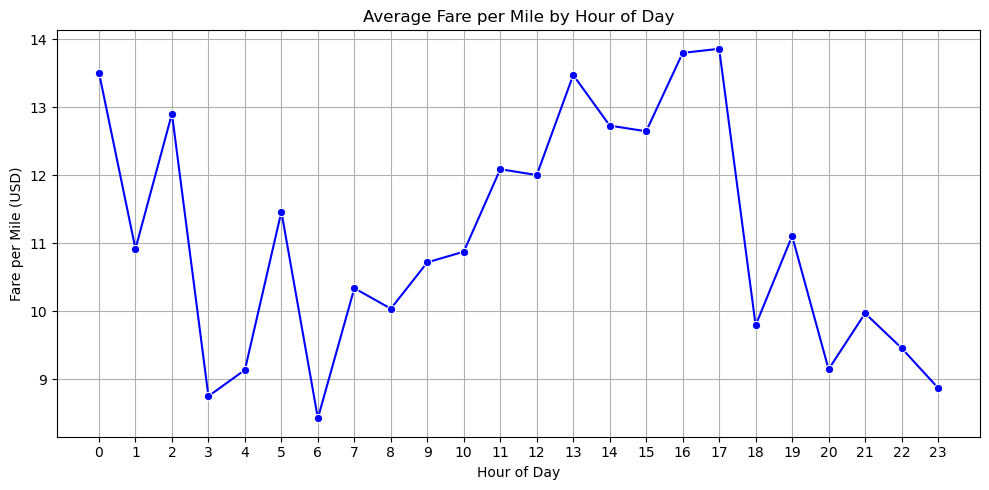

In [493]:
# Compare the average fare per mile for different days and for different times of the day
# Filter valid entries
valid_trips = trip_df[
    (trip_df['trip_distance'] > 0) &
    (trip_df['fare_amount'] > 0)
].copy()
# Calculate fare per mile
valid_trips['fare_per_mile'] = valid_trips['fare_amount'] / valid_trips['trip_distance']

hourly_fare = valid_trips.groupby('pickup_hour')['fare_per_mile'].mean().reset_index()

plt.figure(figsize=(10, 5))
sns.lineplot(data=hourly_fare, x='pickup_hour', y='fare_per_mile', marker='o', color='blue')
plt.title('Average Fare per Mile by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Fare per Mile (USD)')
plt.xticks(range(0, 24))
plt.grid(True)
plt.tight_layout()
plt.show()


**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

In [495]:
# Compare fare per mile for different vendors

# Ensure datetime column is in datetime format
valid_trips['tpep_pickup_datetime'] = pd.to_datetime(valid_trips['tpep_pickup_datetime'])

# Extract pickup day of week (0=Monday, ..., 6=Sunday)
valid_trips['pickup_day'] = valid_trips['tpep_pickup_datetime'].dt.dayofweek

# Map to weekday names
days_map = {0: 'Mon', 1: 'Tue', 2: 'Wed', 3: 'Thu', 4: 'Fri', 5: 'Sat', 6: 'Sun'}
valid_trips['pickup_day'] = valid_trips['pickup_day'].map(days_map)


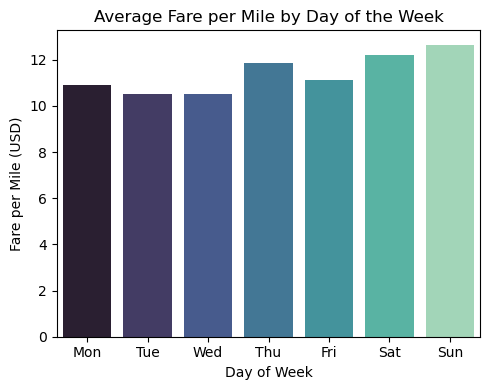

In [497]:
weekly_fare = valid_trips.groupby('pickup_day')['fare_per_mile'].mean().reindex(
    ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
).reset_index()
plt.figure(figsize=(5, 4))
sns.barplot(data=weekly_fare, x='pickup_day', y='fare_per_mile', palette='mako')
plt.title('Average Fare per Mile by Day of the Week')
plt.xlabel('Day of Week')
plt.ylabel('Fare per Mile (USD)')
plt.tight_layout()
plt.show()

**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


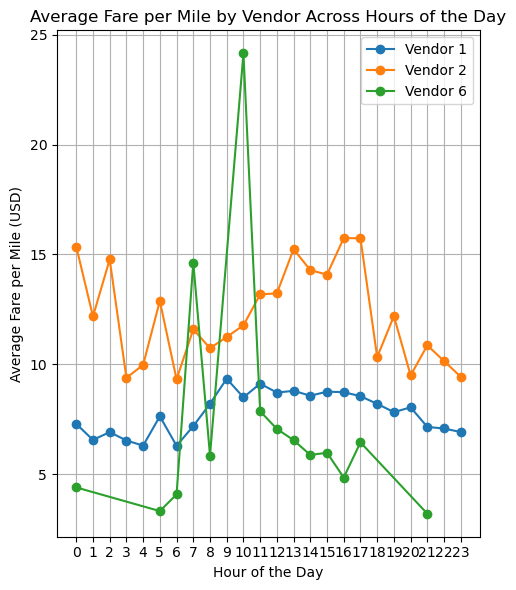

In [501]:
# Defining distance tiers
# Ensure datetime column is in datetime format
valid_trips['tpep_pickup_datetime'] = pd.to_datetime(valid_trips['tpep_pickup_datetime'])

# Create hour column from pickup time
valid_trips['pickup_hour'] = valid_trips['tpep_pickup_datetime'].dt.hour

# Calculate fare per mile (avoid division by 0)
valid_trips = valid_trips[valid_trips['trip_distance'] > 0]
valid_trips['fare_per_mile'] = valid_trips['fare_amount'] / valid_trips['trip_distance']

# Group by vendor and hour and calculate average fare per mile
fare_by_vendor_hour = valid_trips.groupby(['vendorid', 'pickup_hour'])['fare_per_mile'].mean().reset_index()

# Plotting
plt.figure(figsize=(5, 6))
for vendor in fare_by_vendor_hour['vendorid'].unique():
    data = fare_by_vendor_hour[fare_by_vendor_hour['vendorid'] == vendor]
    plt.plot(data['pickup_hour'], data['fare_per_mile'], label=f'Vendor {vendor}', marker='o')

plt.title('Average Fare per Mile by Vendor Across Hours of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Fare per Mile (USD)')
plt.xticks(range(0, 24))
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

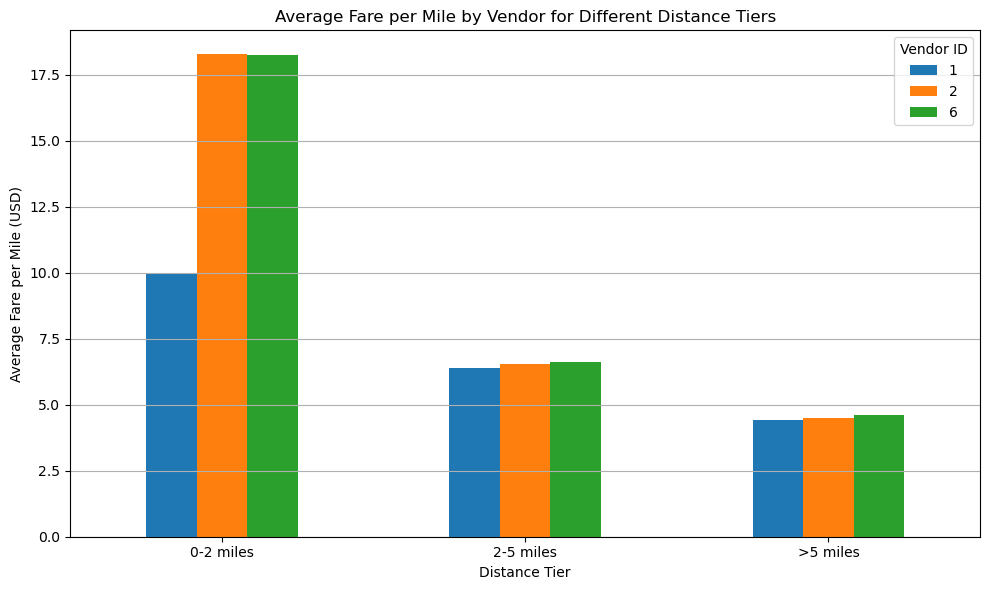

In [503]:
#  Analyze tip percentages based on distances, passenger counts and pickup times
# Filter valid trips with positive distance
valid_trips_tiered = valid_trips[valid_trips['trip_distance'] > 0].copy()

# Define distance tiers
def distance_tier(d):
    if d <= 2:
        return '0-2 miles'
    elif d <= 5:
        return '2-5 miles'
    else:
        return '>5 miles'

valid_trips_tiered['distance_tier'] = valid_trips_tiered['trip_distance'].apply(distance_tier)

# Calculate fare per mile
valid_trips_tiered['fare_per_mile'] = valid_trips_tiered['fare_amount'] / valid_trips_tiered['trip_distance']

# Group by Vendor and distance tier
tier_summary = valid_trips_tiered.groupby(['vendorid', 'distance_tier'])['fare_per_mile'].mean().reset_index()

# Pivot to format for better comparison
pivot_table = tier_summary.pivot(index='distance_tier', columns='vendorid', values='fare_per_mile')

# Plotting
pivot_table.plot(kind='bar', figsize=(10, 6))
plt.title('Average Fare per Mile by Vendor for Different Distance Tiers')
plt.xlabel('Distance Tier')
plt.ylabel('Average Fare per Mile (USD)')
plt.xticks(rotation=0)
plt.legend(title='Vendor ID')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

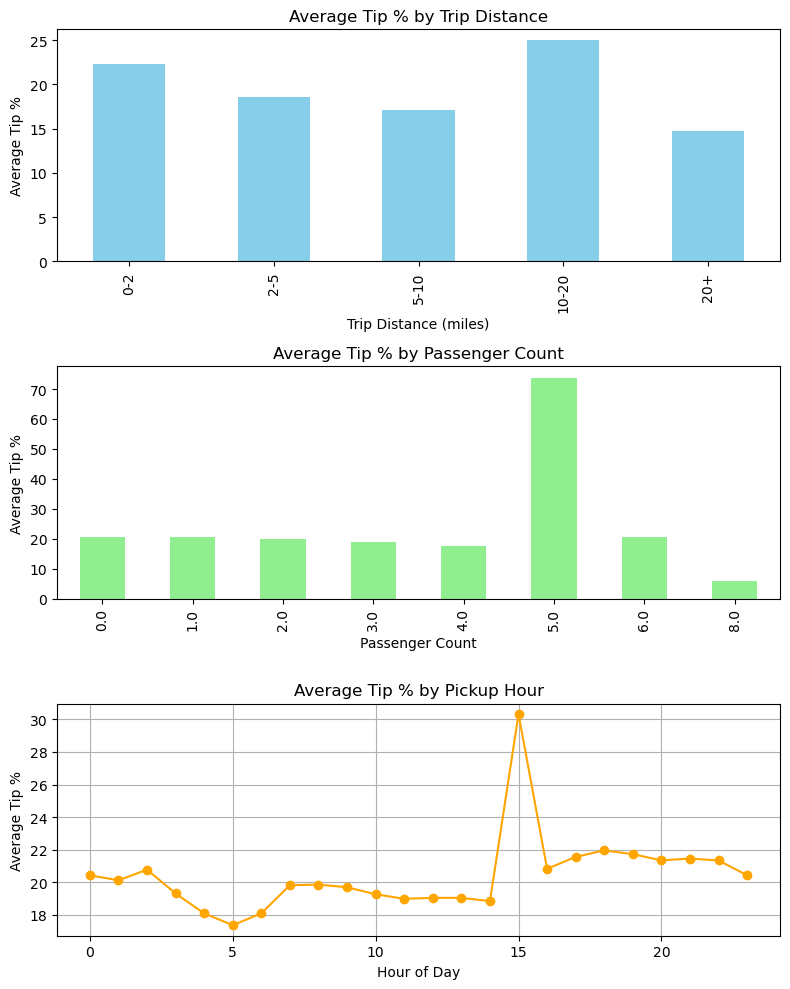

In [505]:
# Filter valid trips with non-zero fare
valid_trips_tip = valid_trips[(valid_trips['fare_amount'] > 0) & (valid_trips['tip_amount'] >= 0)].copy()

# Calculate tip percentage
valid_trips_tip['tip_percent'] = (valid_trips_tip['tip_amount'] / valid_trips_tip['fare_amount']) * 100

# Add hour of pickup if not already extracted
if 'pickup_hour' not in valid_trips_tip.columns:
    valid_trips_tip['pickup_hour'] = valid_trips_tip['tpep_pickup_datetime'].dt.hour

# 1. Tip % vs Trip Distance (binned)
valid_trips_tip['distance_bin'] = pd.cut(valid_trips_tip['trip_distance'],
                                         bins=[0, 2, 5, 10, 20, 50],
                                         labels=['0-2', '2-5', '5-10', '10-20', '20+'])

tip_by_distance = valid_trips_tip.groupby('distance_bin')['tip_percent'].mean()

# 2. Tip % vs Passenger Count
tip_by_passenger = valid_trips_tip.groupby('passenger_count')['tip_percent'].mean()

# 3. Tip % vs Pickup Hour
tip_by_hour = valid_trips_tip.groupby('pickup_hour')['tip_percent'].mean()

# Plotting
fig, axs = plt.subplots(3, 1, figsize=(8, 10))

# Distance plot
tip_by_distance.plot(kind='bar', ax=axs[0], color='skyblue')
axs[0].set_title('Average Tip % by Trip Distance')
axs[0].set_xlabel('Trip Distance (miles)')
axs[0].set_ylabel('Average Tip %')

# Passenger count plot
tip_by_passenger.plot(kind='bar', ax=axs[1], color='lightgreen')
axs[1].set_title('Average Tip % by Passenger Count')
axs[1].set_xlabel('Passenger Count')
axs[1].set_ylabel('Average Tip %')

# Pickup hour plot
tip_by_hour.plot(kind='line', ax=axs[2], marker='o', color='orange')
axs[2].set_title('Average Tip % by Pickup Hour')
axs[2].set_xlabel('Hour of Day')
axs[2].set_ylabel('Average Tip %')
axs[2].grid(True)

plt.tight_layout()
plt.show()

In [507]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%
# Ensure tip_percent column exists
valid_trips['tip_percent'] = (valid_trips['tip_amount'] / valid_trips['fare_amount']) * 100

# Define low and high tip groups
low_tip = valid_trips[valid_trips['tip_percent'] < 10].copy()
high_tip = valid_trips[valid_trips['tip_percent'] > 25].copy()

# Extract pickup hour if not already done
if 'pickup_hour' not in valid_trips.columns:
    valid_trips['pickup_hour'] = valid_trips['tpep_pickup_datetime'].dt.hour
    low_tip['pickup_hour'] = low_tip['tpep_pickup_datetime'].dt.hour
    high_tip['pickup_hour'] = high_tip['tpep_pickup_datetime'].dt.hour

# 1. Compare average trip distance
avg_distance_low = low_tip['trip_distance'].mean()
avg_distance_high = high_tip['trip_distance'].mean()

# 2. Compare average pickup hour
avg_hour_low = low_tip['pickup_hour'].mean()
avg_hour_high = high_tip['pickup_hour'].mean()

# 3. Compare average passenger count
avg_passenger_low = low_tip['passenger_count'].mean()
avg_passenger_high = high_tip['passenger_count'].mean()

# 4. Compare payment method usage
payment_low = low_tip['payment_type'].value_counts(normalize=True)
payment_high = high_tip['payment_type'].value_counts(normalize=True)

# 5. Optional: compare pickup zones (if merged)
pickup_zone_low = low_tip['PU_zone'].value_counts().head(5) if 'PU_zone' in low_tip.columns else None
pickup_zone_high = high_tip['PU_zone'].value_counts().head(5) if 'PU_zone' in high_tip.columns else None

# Display results
print("=== Comparison Between Low and High Tip Trips ===")
print(f"\nAvg Trip Distance:\n - Low Tip: {avg_distance_low:.2f} mi\n - High Tip: {avg_distance_high:.2f} mi")

print(f"\nAvg Pickup Hour:\n - Low Tip: {avg_hour_low:.1f} hrs\n - High Tip: {avg_hour_high:.1f} hrs")

print(f"\nAvg Passenger Count:\n - Low Tip: {avg_passenger_low:.1f}\n - High Tip: {avg_passenger_high:.1f}")

print(f"\nPayment Types (Low Tip):\n{payment_low}")
print(f"\nPayment Types (High Tip):\n{payment_high}")

if pickup_zone_low is not None and pickup_zone_high is not None:
    print(f"\nTop Pickup Zones (Low Tip):\n{pickup_zone_low}")
    print(f"\nTop Pickup Zones (High Tip):\n{pickup_zone_high}")


=== Comparison Between Low and High Tip Trips ===

Avg Trip Distance:
 - Low Tip: 4.08 mi
 - High Tip: 2.36 mi

Avg Pickup Hour:
 - Low Tip: 13.9 hrs
 - High Tip: 14.6 hrs

Avg Passenger Count:
 - Low Tip: 1.4
 - High Tip: 1.4

Payment Types (Low Tip):
payment_type
2    0.639290
1    0.290530
0    0.030433
4    0.026157
3    0.013590
Name: proportion, dtype: float64

Payment Types (High Tip):
payment_type
1    0.986637
0    0.013347
2    0.000015
Name: proportion, dtype: float64


**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

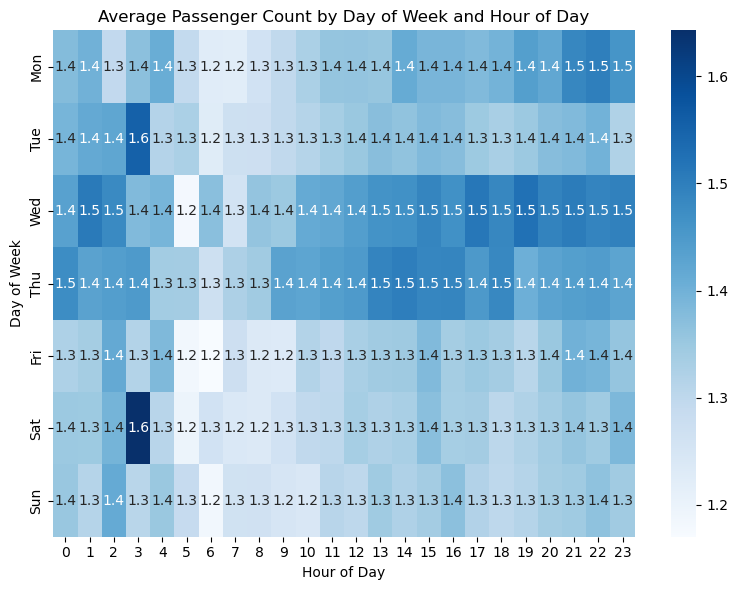

In [509]:
# See how passenger count varies across hours and days
# Extract hour and weekday if not already present
if 'pickup_hour' not in valid_trips.columns:
    valid_trips['pickup_hour'] = valid_trips['tpep_pickup_datetime'].dt.hour

if 'pickup_day' not in valid_trips.columns:
    valid_trips['pickup_day'] = valid_trips['tpep_pickup_datetime'].dt.dayofweek  # 0 = Monday

# Create a pivot table of avg passenger count
passenger_pivot = valid_trips.groupby(['pickup_day', 'pickup_hour'])['passenger_count'].mean().reset_index()

# Pivot for heatmap format
passenger_heatmap = passenger_pivot.pivot(index='pickup_day', columns='pickup_hour', values='passenger_count')

# Optional: rename days for clarity
days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
passenger_heatmap.index = days

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(passenger_heatmap, annot=True, fmt=".1f", cmap="Blues")
plt.title("Average Passenger Count by Day of Week and Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Day of Week")
plt.tight_layout()
plt.show()



**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

In [523]:
# How does passenger count vary across zones
# Group by pickup zone and calculate average passenger count
passenger_counts_by_zone = trip_df.groupby('pu_zone')['passenger_count'].mean().sort_values(ascending=False)

# Display top 10 zones with highest average passenger count
print("Top 10 Zones by Average Passenger Count:")
print(passenger_counts_by_zone.head(10))


Top 10 Zones by Average Passenger Count:
pu_zone
Arrochar/Fort Wadsworth         2.250000
Fresh Meadows                   2.000000
Battery Park                    1.828358
Newark Airport                  1.744186
South Williamsburg              1.666667
Bayside                         1.666667
Kew Gardens                     1.650000
Flushing Meadows-Corona Park    1.616667
Woodhaven                       1.600000
Baisley Park                    1.582524
Name: passenger_count, dtype: float64


Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

In [519]:
    # How often is each surcharge applied?

surcharge_columns = [
    'extra', 
    'mta_tax', 
    'improvement_surcharge', 
    'congestion_surcharge', 
    'airport_fee'
]

print("Frequency of Each Surcharge Applied:")

    for col in surcharge_columns:
        applied_count = (valid_trips[col] > 0).sum()
        percent = applied_count / len(valid_trips) * 100
        print(f"{col}: {applied_count:,} trips ({percent:.2f}%)")

Frequency of Each Surcharge Applied:
extra: 176,700 trips (60.68%)
mta_tax: 289,250 trips (99.33%)
improvement_surcharge: 291,199 trips (100.00%)
congestion_surcharge: 263,122 trips (90.36%)
airport_fee: 22,978 trips (7.89%)


## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.